In [1]:
import pymol
from pymol import cmd, stored
import matplotlib
from matplotlib import cm
import sys
from collections import defaultdict

### PyMol games

In [2]:
pymol.pymol_argv = ['pymol', '-qc'] # quiet / no GUI
stdout = sys.stdout
stderr = sys.stderr
pymol.finish_launching(['pymol', '-xiq'])
sys.stdout = stdout
sys.stderr = stderr

In [ ]:
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks05'
image_counter = Counter()
session_counter = Counter()

#### Creating .pse files with every segment's positions

In [ ]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb'
pdb_file = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM.pse'

pse_with_ligand = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM_with_ligand_white_6A.pse'
object_name='his3_prediction'

In [ ]:
for segment_name in positions.segment.values:
    title = 'Segment %s positions' %segment_name
    position_list = positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(position_list, constant_color=segment_colors[segment_name])
    cmd.hide('everything', '4LOM')
    cmd.color('orange', 'ligand')
    cmd.show('spheres', 'ligand')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

#### Coloring segments positions by fitness of single mutants

In [8]:
for segment_name in positions.segment.values:
    title = 'Fitness of single mutants in segment %s' %segment_name
    position_list = positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]
    by_position = data_singles[segment_name + '_scaled'].groupby('position_Scer')['s'].agg(np.median)
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(position_list, constant_color='#999999')
    color_positions(by_position.index, values=by_position.values)
    cmd.hide('everything', '4LOM')
    cmd.color('orange', 'ligand')
    cmd.show('spheres', 'ligand')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


#### Coloring all positions by fitness of single mutants

In [9]:
title = 'Fitness of single mutants across all segments'
position_list = []
by_position = pd.Series(dtype=np.float)
for segment_name in positions.segment.values:
    position_list.extend(list(positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]))
    by_position_segment = data_singles[segment_name + '_scaled'].groupby('position_Scer')['s'].agg(np.median)
    by_position = by_position.append(by_position_segment, verify_integrity=True)
cmd.reinitialize()
open_or_fetch(pse_with_ligand)
# white_and_beautiful()
color_positions(position_list, constant_color='#999999')
color_positions(by_position.index, values=by_position.values)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


#### Mutations in active site

In [10]:
title = 'Fitness of single mutants in active site'
cmd.reinitialize()
open_or_fetch(pse_with_ligand)
active_site = get_residues_from_selection('res_around_ligand_6A & HIS3_saccharomyces_cerevisiae__itasser_model1_prediction')
position_list = by_position.loc[active_site]
color_positions(position_list.index, constant_color='#999999')
color_positions(position_list[~np.isnan(position_list)].index, values=position_list[~np.isnan(position_list)].values)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


### For Katya

In [67]:
# for Katya
# katya_mutations = ['112T', '172W', '181Y', '181K', '184I', '185T', '187T', '190D', '201K', '204I', '205T', '206S', '207T', '210D', '85I']
# katya_positions = [int(m[:-1]) for m in katya_mutations]
katya_mutations1 = ['181Y', '181K', '184I', '185T', '187T', '190D']
katya_positions1 = [int(m[:-1]) for m in katya_mutations1]

katya_mutations2 = ['201K', '204I', '205T', '206S', '207T', '210D']
katya_positions2 = [int(m[:-1]) for m in katya_mutations2]

title = 'Positions for Katya'
cmd.reinitialize()
open_or_fetch(pdb_file, object_name=object_name)
white_and_beautiful()
color_positions(katya_positions1, representation='sticks', constant_color=10)
color_positions(katya_positions2, representation='sticks', constant_color=250)
cmd.hide('everything', '4LOM')
cmd.color('orange', 'ligand')
cmd.show('spheres', 'ligand')
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


In [55]:
for i in range(10):
    title = 'GFP positions iteration %s' %i
    cmd.reinitialize()
    prepare_GFP_2WUR()
    white_and_beautiful()
    color_positions(np.random.choice(range(235), 39), representation='ribbon')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


### Coloring positions by median impact of mutations in all backgrounds

### Nat_lib

#### Using precalculated impacts

In [21]:
by_positions = OrderedDict()
directory = os.path.join(files_dump_folder, 'impacts_of_mutations_in_all_backgrounds__nat_lib')
for segment in data_natural:
    by_positions[segment] = defaultdict(list)
    for f in os.listdir(directory):
        segm = f.split('_')[1]
        mutation = f.split('_')[-1].split('.')[0]
        position = int(mutation[:-1])
        if segm == segment.split('_')[0]:
            by_positions[segment][position].append(pd.read_hdf(os.path.join(directory, f)))

#### Creating PyMol session files

In [50]:
for segment in data_natural:
    positions = []
    impacts = []
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
    impacts.append(0) #to scale all segments similarly
#     print positions, impacts
    title = 'segment %s - positions colored by median impact of mutations in all backgrounds in nat_lib' %segment.split('_')[0]
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(positions, values=impacts, representation='spheres')
    cmd.hide('everything', '4LOM')
    cmd.color('orange', 'ligand')
    cmd.show('spheres', 'ligand')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


In [58]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb'
positions = []
impacts = []
for segment in data_natural:
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
impacts = [max(e, 0.38) for e in impacts]
title = 'all segments - positions colored by median impact of mutations in all backgrounds in nat_lib'
cmd.reinitialize()
open_or_fetch(pdb_file, object_name=object_name)
white_and_beautiful()
color_positions(positions, values=impacts, representation='lines')
# cmd.hide('everything', '4LOM')
# cmd.color('orange', 'ligand')
# cmd.show('spheres', 'ligand')
for segment in data_natural:
    cmd.select('segment_%s' %segment.split('_')[0], 'resi %s' %('+'.join([str(e) for e in by_positions[segment]])))
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


## Full lib

#### Using precalculated impacts

In [21]:
by_positions = OrderedDict()
directory = os.path.join(files_dump_folder, 'impacts_of_mutations_in_all_backgrounds__full_lib')
for segment in data:
    by_positions[segment] = defaultdict(list)
    for f in os.listdir(directory):
        segm = f.split('_')[1]
        mutation = f.split('_')[-1].split('.')[0]
        position = int(mutation[:-1])
        if segm == segment.split('_')[0]:
            by_positions[segment][position].append(pd.read_hdf(os.path.join(directory, f)))

#### Creating PyMol session files

In [24]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb'
for segment in data_natural:
    positions = []
    impacts = []
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
    impacts.append(0) #to scale all segments similarly
#     print positions, impacts
    title = 'segment %s - positions colored by median impact of mutations in all backgrounds in nat_lib' %segment.split('_')[0]
    cmd.reinitialize()
    open_or_fetch(pdb_file)
    white_and_beautiful()
    color_positions(positions, values=impacts, representation='spheres')
#     cmd.hide('everything', '4LOM')
#     cmd.color('orange', 'ligand')
#     cmd.show('spheres', 'ligand')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


In [27]:
pdb_file = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM.pse'
positions = []
impacts = []
for segment in data_natural:
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
impacts = [max(e, 0.38) for e in impacts]
title = 'all segments - positions colored by median impact of mutations in all backgrounds in nat_lib'
cmd.reinitialize()
open_or_fetch(pdb_file)
white_and_beautiful()
color_positions(positions, values=impacts, representation='lines')
cmd.hide('everything', '4LOM')
cmd.color('orange', 'ligand')
cmd.show('spheres', 'ligand')
for segment in data_natural:
    cmd.select('segment_%s' %segment.split('_')[0], 'resi %s' %('+'.join([str(e) for e in by_positions[segment]])))
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


## Mapping sign epistasis

In [4]:
def select_residue(position_number):
    selection_name = 'r%s' %position_number
    what_to_select = 'resi %s' %position_number
    cmd.select(selection_name, what_to_select)
    print selection_name, what_to_select
    return selection_name

In [18]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb'
title = 'line_test'
cmd.reinitialize()
open_or_fetch(pdb_file, object_name='HIS3_itasser')
white_and_beautiful()
pos1 = select_residue(10)
pos2 = select_residue(20)
print cmd.distance('qwe', pos1, pos2)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

r10 resi 10
r20 resi 20
13.046792984
 Applying pse_export_version=1.720 compatibility


In [38]:
lucas_epistasis.columns

Index([u'VarPos', u'Perm', u'GroupCount', u'mean_FitImpactThreshBad3',
       u'sum_FitImpactThreshBad3', u'mean_FitImpactThreshGood3',
       u'sum_FitImpactThreshGood3', u'mean_FitImpactThreshBad2',
       u'sum_FitImpactThreshBad2', u'mean_FitImpactThreshGood2',
       u'sum_FitImpactThreshGood2', u'ValidationAcc', u'RealPos'],
      dtype='object')

In [55]:
def deviation_from_diagonal(df):
    return np.abs(np.log(df['mean_FitImpactThreshGood2'] / df['mean_FitImpactThreshBad2']))

In [61]:
lucas_epistasis = pd.read_table('/Users/karen/Downloads/Seg2SignEpi.txt')
subset = lucas_epistasis[lucas_epistasis.ValidationAcc > 0.]
subset['diagnoal_deviation'] = subset.apply(deviation_from_diagonal, axis=1)

pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb'
columns = ['mean_FitImpactThreshGood2', 'sum_FitImpactThreshGood2', 'mean_FitImpactThreshBad2', 'sum_FitImpactThreshBad2']
for column in ['diagnoal_deviation']:
    title = 'Lucas sign epistasis dataset for segment 2  %s' %column 
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name='HIS3')
    white_and_beautiful()
    to_plot = subset.groupby('RealPos')[column].agg(np.max)
    color_positions(to_plot.index, to_plot.values)
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


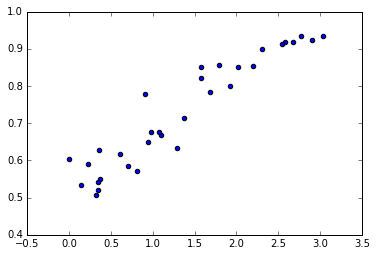

In [60]:
plt.scatter(subset['diagnoal_deviation'], subset['ValidationAcc'])